In [1]:
# import necessary packages
import openeo

# connect with the backend
eoconn = openeo.connect("openeofed.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [2]:
# Setup process parameters
aoi = {
    "type": "Polygon",
    "coordinates": [
        [
            [5.179324150085449, 51.2498689148547],
            [5.178744792938232, 51.24672597710759],
            [5.185289382934569, 51.24504696935156],
            [5.18676996231079, 51.245342479161295],
            [5.187370777130127, 51.24918393390799],
            [5.179324150085449, 51.2498689148547],
        ]
    ],
}
date = ["2018-06-27", "2018-06-27"]

In [7]:
# Create a processing graph from the MSI process using an active openEO connection
msi = eoconn.datacube_from_process(
    "msi",
    namespace="https://raw.githubusercontent.com/VITObelgium/openeo_algorithm_catalog/9f555cd25f1d5149d45254248f9710f784df9814/msi/openeo_udp/msi.json",
    temporal_extent=date,
    spatial_extent=aoi,
)

In [8]:
msi_job = msi.create_job(title="MSI_example")
msi_job.start_and_wait()

0:00:00 Job 'cdse-j-251119134203489aa2b19f257fb9a489': send 'start'
0:00:14 Job 'cdse-j-251119134203489aa2b19f257fb9a489': queued (progress 0%)
0:00:19 Job 'cdse-j-251119134203489aa2b19f257fb9a489': queued (progress 0%)
0:00:26 Job 'cdse-j-251119134203489aa2b19f257fb9a489': queued (progress 0%)
0:00:34 Job 'cdse-j-251119134203489aa2b19f257fb9a489': queued (progress 0%)
0:00:44 Job 'cdse-j-251119134203489aa2b19f257fb9a489': queued (progress 0%)
0:00:56 Job 'cdse-j-251119134203489aa2b19f257fb9a489': queued (progress 0%)
0:01:12 Job 'cdse-j-251119134203489aa2b19f257fb9a489': queued (progress 0%)
0:01:31 Job 'cdse-j-251119134203489aa2b19f257fb9a489': running (progress N/A)
0:01:56 Job 'cdse-j-251119134203489aa2b19f257fb9a489': running (progress N/A)
0:02:27 Job 'cdse-j-251119134203489aa2b19f257fb9a489': finished (progress 100%)


<BatchJob job_id='cdse-j-251119134203489aa2b19f257fb9a489'>

In [5]:
results = msi_job.get_results()
results.download_files("output/msi/")

[PosixPath('output/msi/openEO_2018-06-27Z.tif'),
 PosixPath('output/msi/job-results.json')]

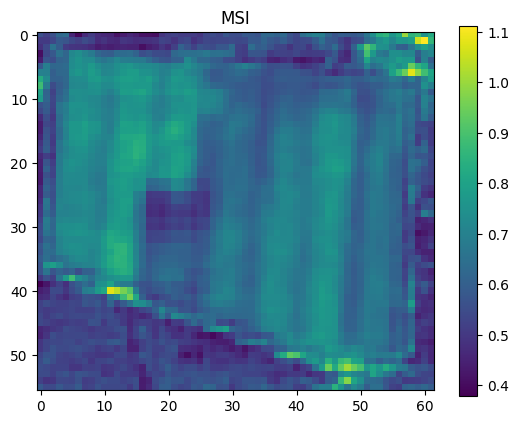

In [6]:
import rasterio
import matplotlib.pyplot as plt

img = rasterio.open("output/msi/openEO_2018-06-27Z.tif")
# plot the first band
plt.imshow(img.read(1))
plt.colorbar()
plt.title("MSI")
plt.show()